In [3]:
#!python numbers=disable
from matplotlib         import pylab as p
from matplotlib.text import Text

class DragHandler(object):
    """ A simple class to handle Drag n Drop.

    This is a simple example, which works for Text objects only
    """
    def __init__(self, figure=None) :
        """ Create a new drag handler and connect it to the figure's event system.
        If the figure handler is not given, the current figure is used instead
        """

        if figure is None : figure = p.gcf()
        # simple attibute to store the dragged text object
        self.dragged = None

        # Connect events and callbacks
        figure.canvas.mpl_connect("pick_event", self.on_pick_event)
        figure.canvas.mpl_connect("button_release_event", self.on_release_event)

    def on_pick_event(self, event):
        " Store which text object was picked and were the pick event occurs."

        if isinstance(event.artist, Text):
            self.dragged = event.artist
            self.pick_pos = (event.mouseevent.xdata, event.mouseevent.ydata)
        return True

    def on_release_event(self, event):
        " Update text position and redraw"

        if self.dragged is not None :
            old_pos = self.dragged.get_position()
            new_pos = (old_pos[0] + event.xdata - self.pick_pos[0],
                       old_pos[1] + event.ydata - self.pick_pos[1])
            self.dragged.set_position(new_pos)
            self.dragged = None
            p.draw()
        return True

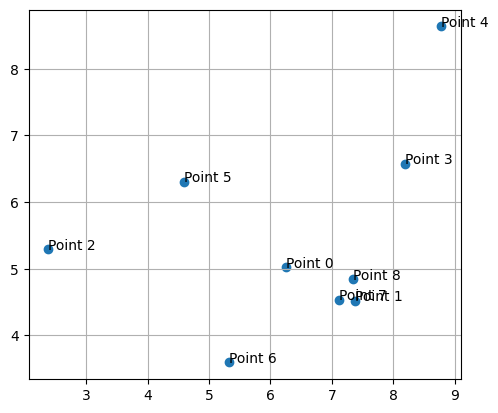

In [5]:
#! python numbers=disable

# Usage example
from numpy import *

# Create arbitrary points and labels
x, y = random.normal(5, 2, size=(2, 9))
labels = [ "Point %d" % i for i in arange(x.size)]

# trace a scatter plot
p.scatter(x, y)
p.grid()

# add labels and set their picker attribute to True
for a,b,l in zip(x,y, labels):
    p.text(a, b, l, picker=True)

# Create the event hendler 
dragh = DragHandler()

p.show()